In [103]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check Observables

We check the observables for different lattice sizes of the $\mathbb{Z}_2$ model changing the Hamiltonian parameter $g$.

$$ H = -g\sum_{i}\sigma_i^x -\frac{1}{g} \sum_{i}\square_i^{Plaquette} $$

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, binders_cumul

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

## Observables with different Bond Dimensions $\chi$

### 1. t'Hooft String

In [105]:
chis = [4,16,64,128,512]
L = 6
l = L
h_i = 0.4
h_f = 0.7
lx = 2
ly = 2
npoints = 50
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
strings = []
for i, chi in enumerate(chis):
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    strings.append(string)
    plt.plot(hs, string, color=colors[i], label=f"$\chi={chi}$")
plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


TimeoutError: [Errno 60] Operation timed out

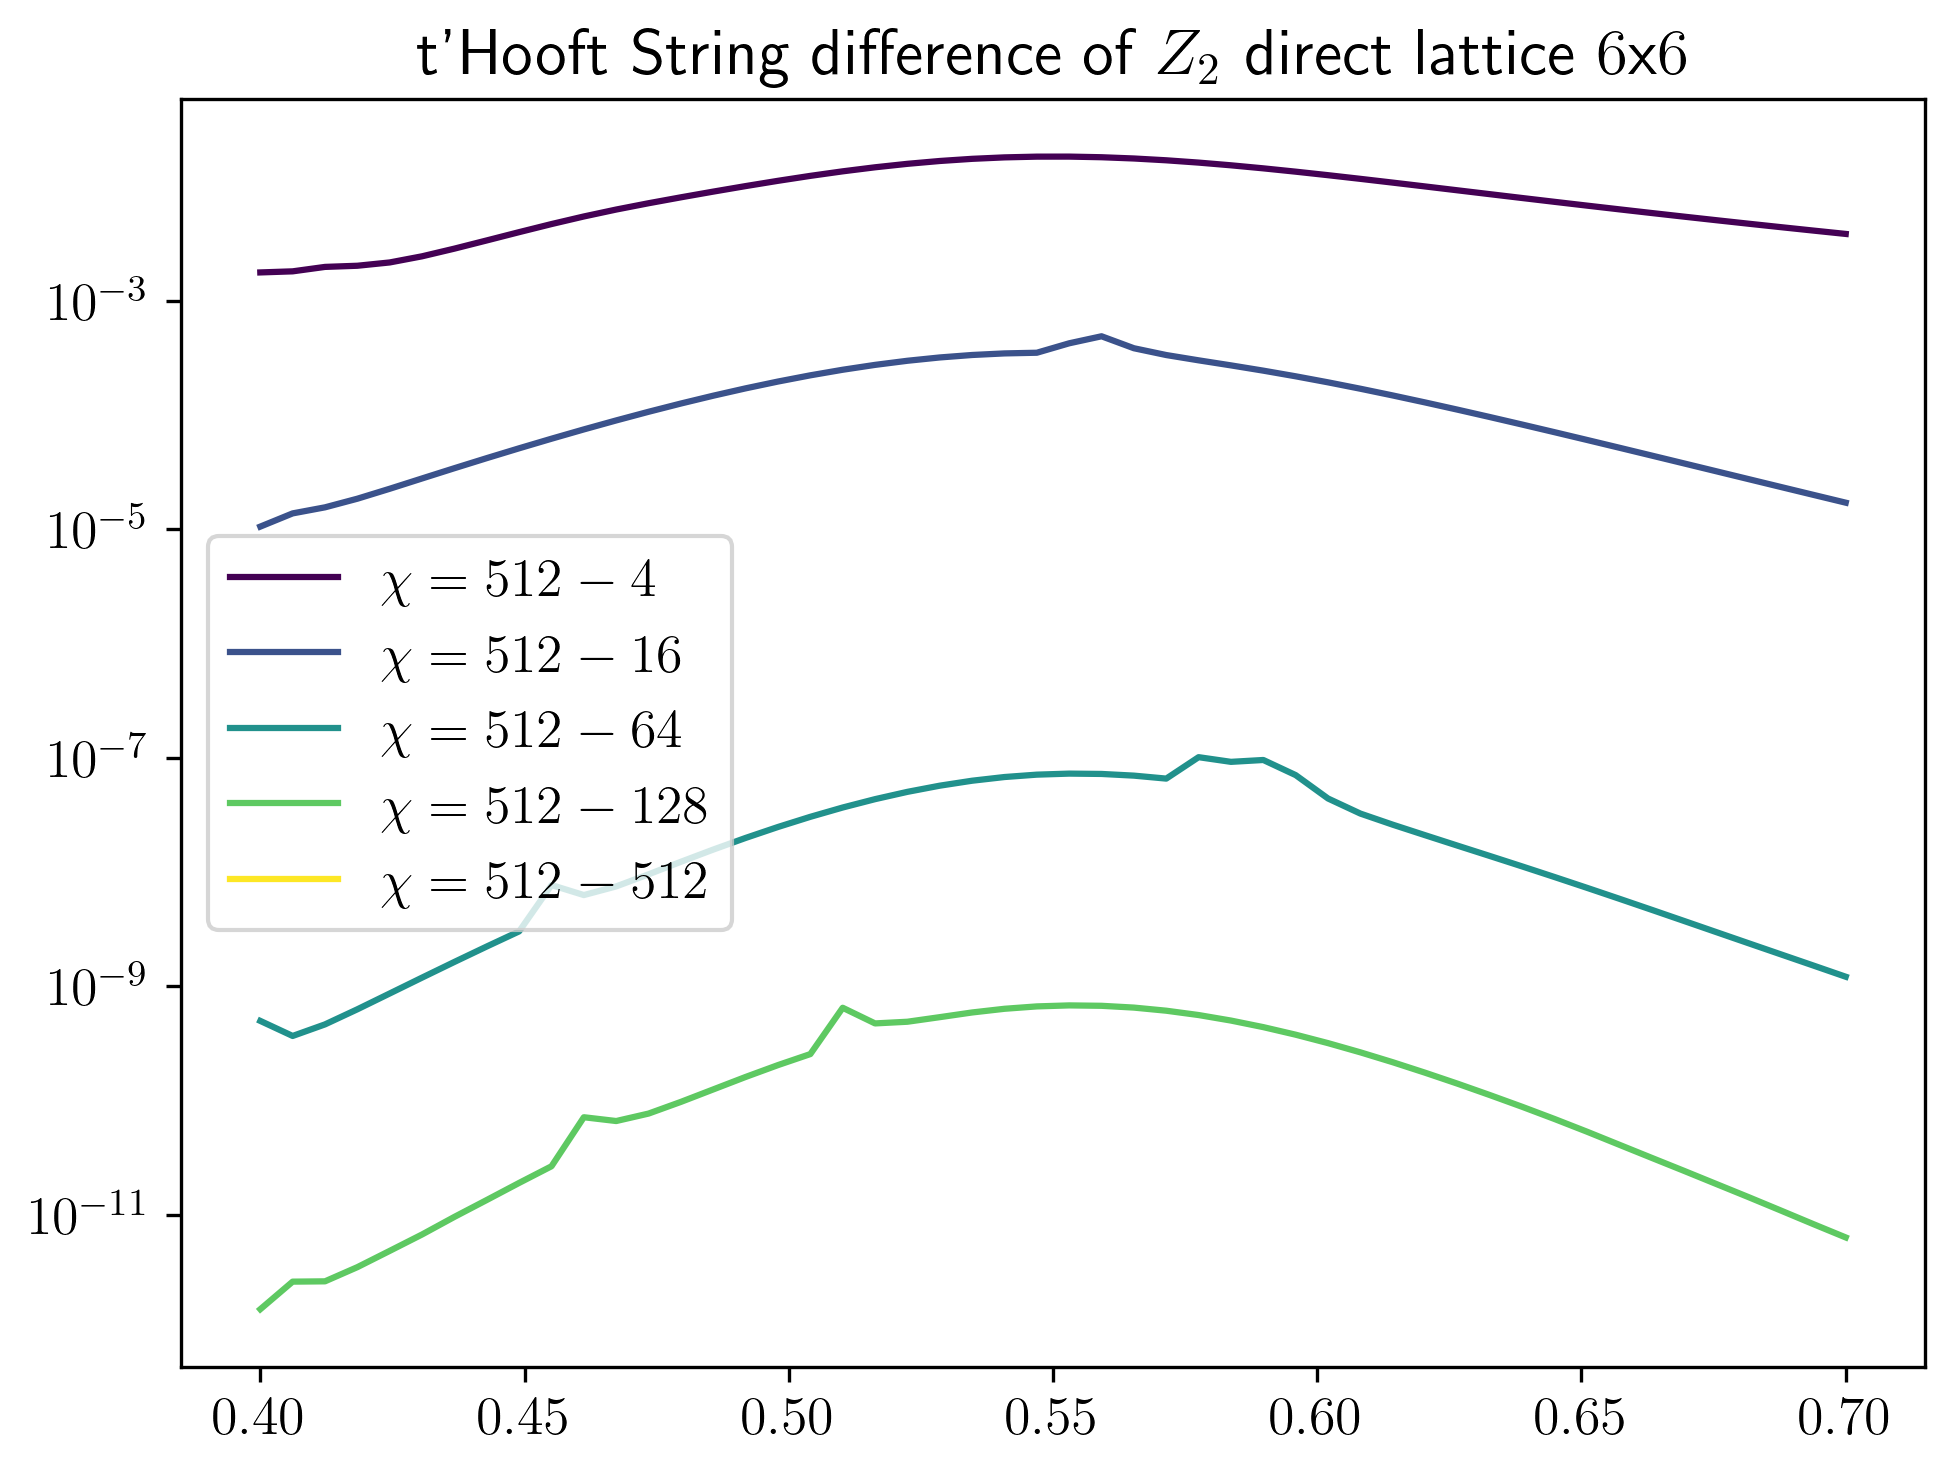

In [ ]:
# plot difference between curves
for i, chi in enumerate(chis):
    diffs = np.abs(np.asarray(strings[-1])-np.asarray(strings[i]))
    plt.plot(hs, diffs, color=colors[i], label=f"$\chi={chis[-1]}-{chis[i]}$")
plt.title(f"t'Hooft String difference of $Z_2$ direct lattice ${l}$x${L}$")
plt.yscale('log')
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_difference_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


## Observables with different Lattice sizes

### 1. t'Hooft String

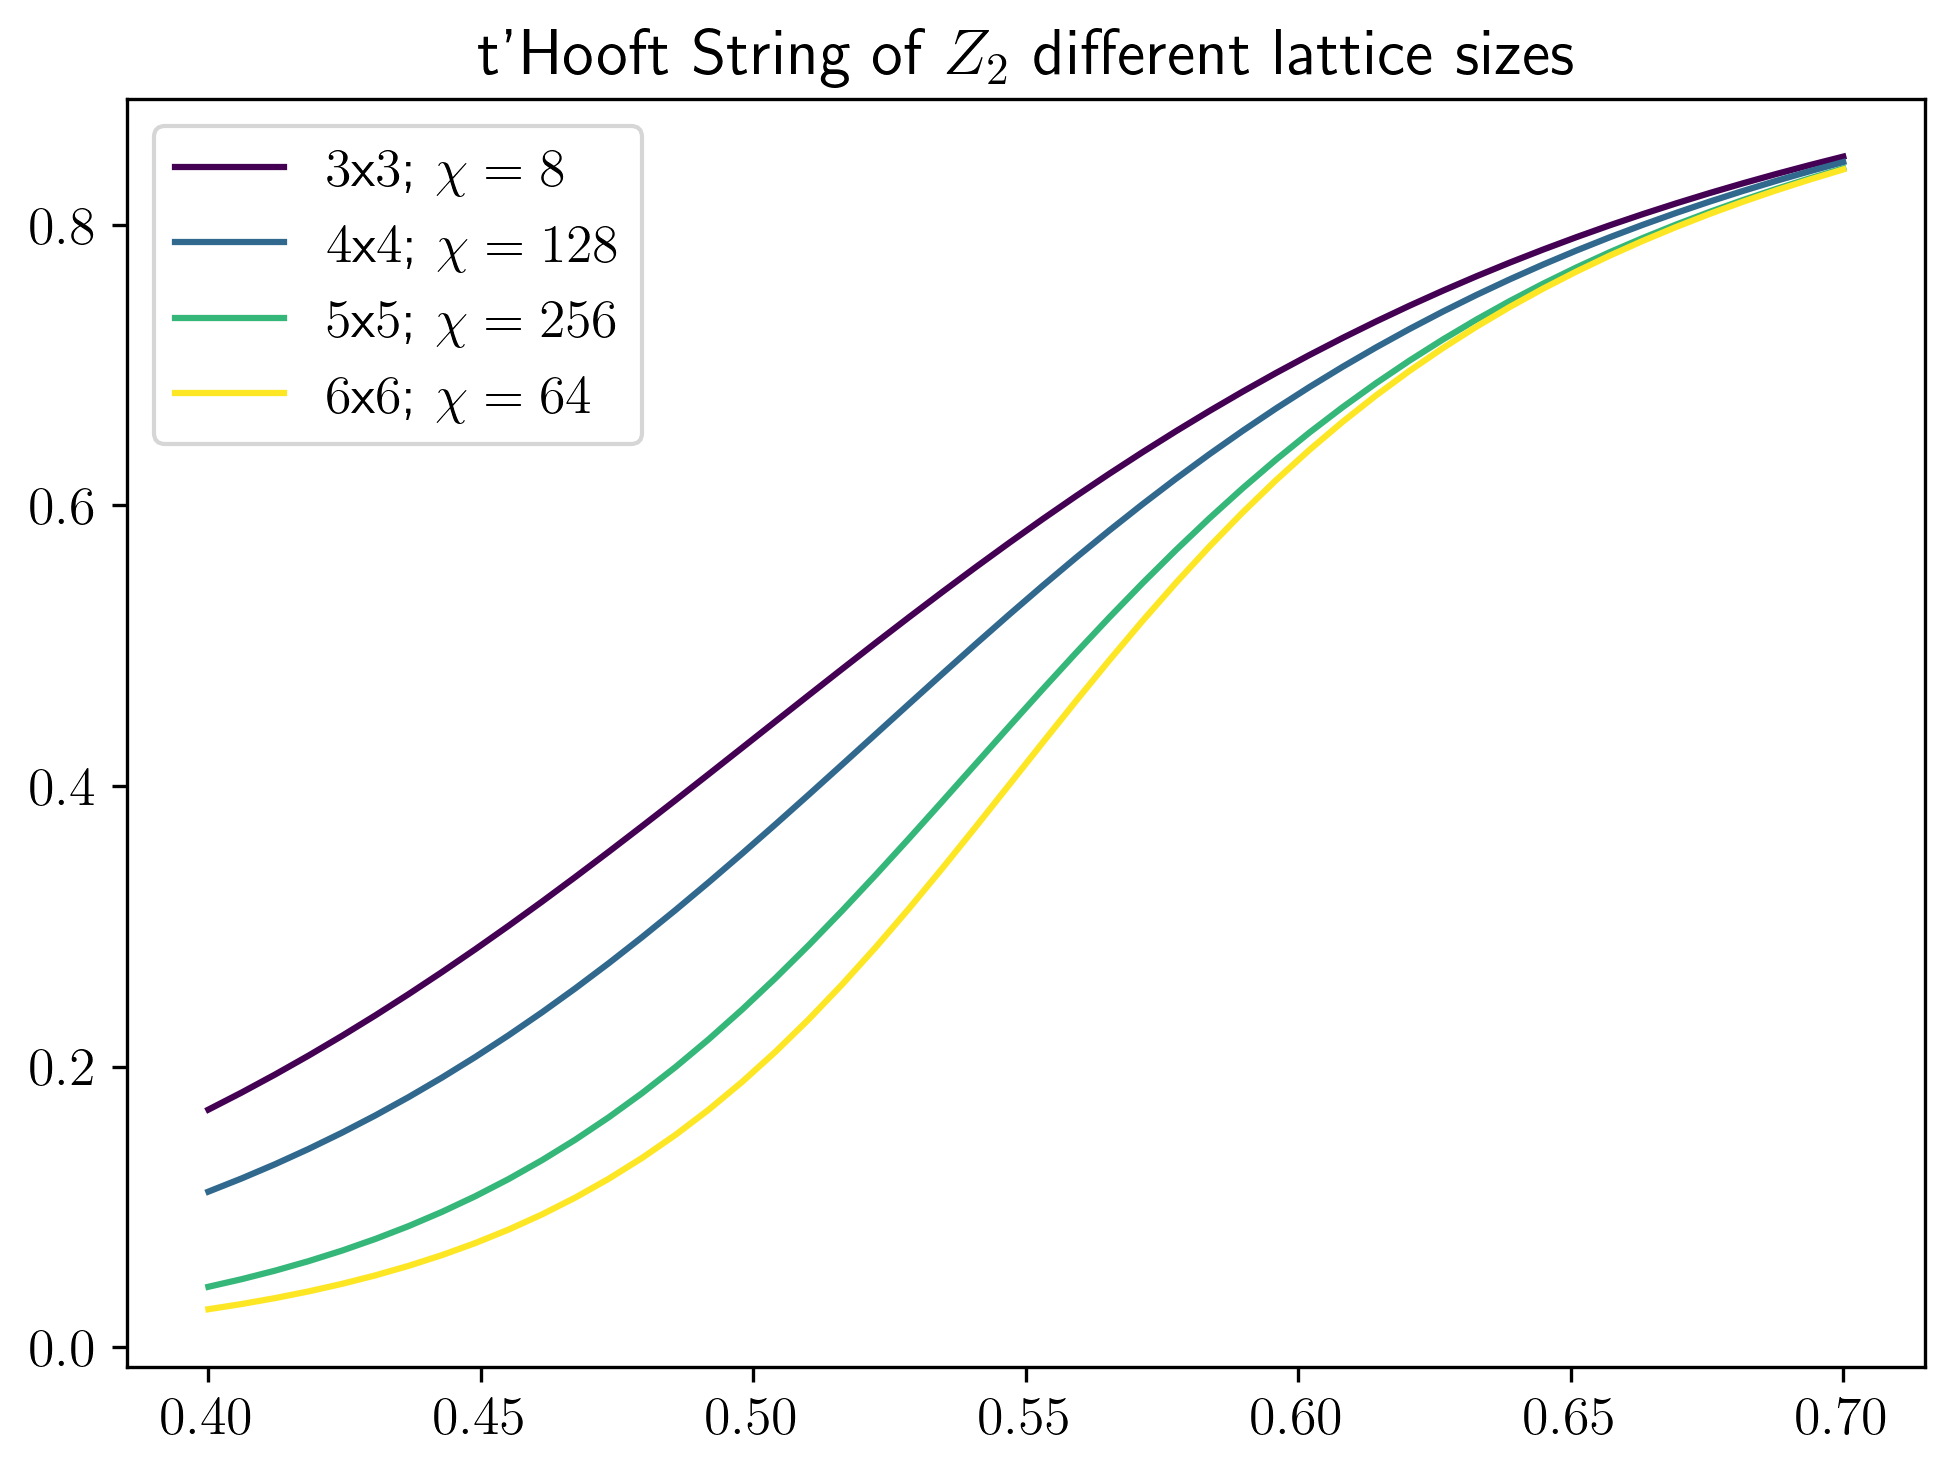

In [ ]:
Ls = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    plt.plot(hs, string, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1

plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### Extracting $\gamma$ and $\nu$ from $g_c$ with a $Log$ law

We know that:
$$ \frac{dM}{dg}|_{h_{max}} \sim |g_c(L)-g_c(\infty)|^{-\gamma} \sim L^{\frac{\gamma}{\nu}}$$
where the derivative of the magnetization represents the susceptibility and the $\gamma, \nu$ *critical exponents* can be found with two formulas. 
1. In one formula we use the experimental value of $g_c^{exp}(\infty)=0.555$ extracted from the entropy maxima and the critical point for finite sizes $L$ to find $\nu$:
$$ |g_c(L)-g_c^{exp}(\infty)|^{-\gamma (\frac{-\nu}{-\nu})}=cL^{\frac{\gamma}{\nu}} $$
$$ \log(|g_c(L)-g_c^{exp}(\infty)|)=c + \frac{1}{\nu} \log(\frac{1}{L}) $$
2. Now we use the $\nu$ just found to get $\gamma$:
$$ \log(\frac{dM}{dg}|_{h_{max}}) = \log(cL^{\frac{\gamma}{\nu}})= \log(c)+\frac{\gamma}{\nu}\log(L)$$

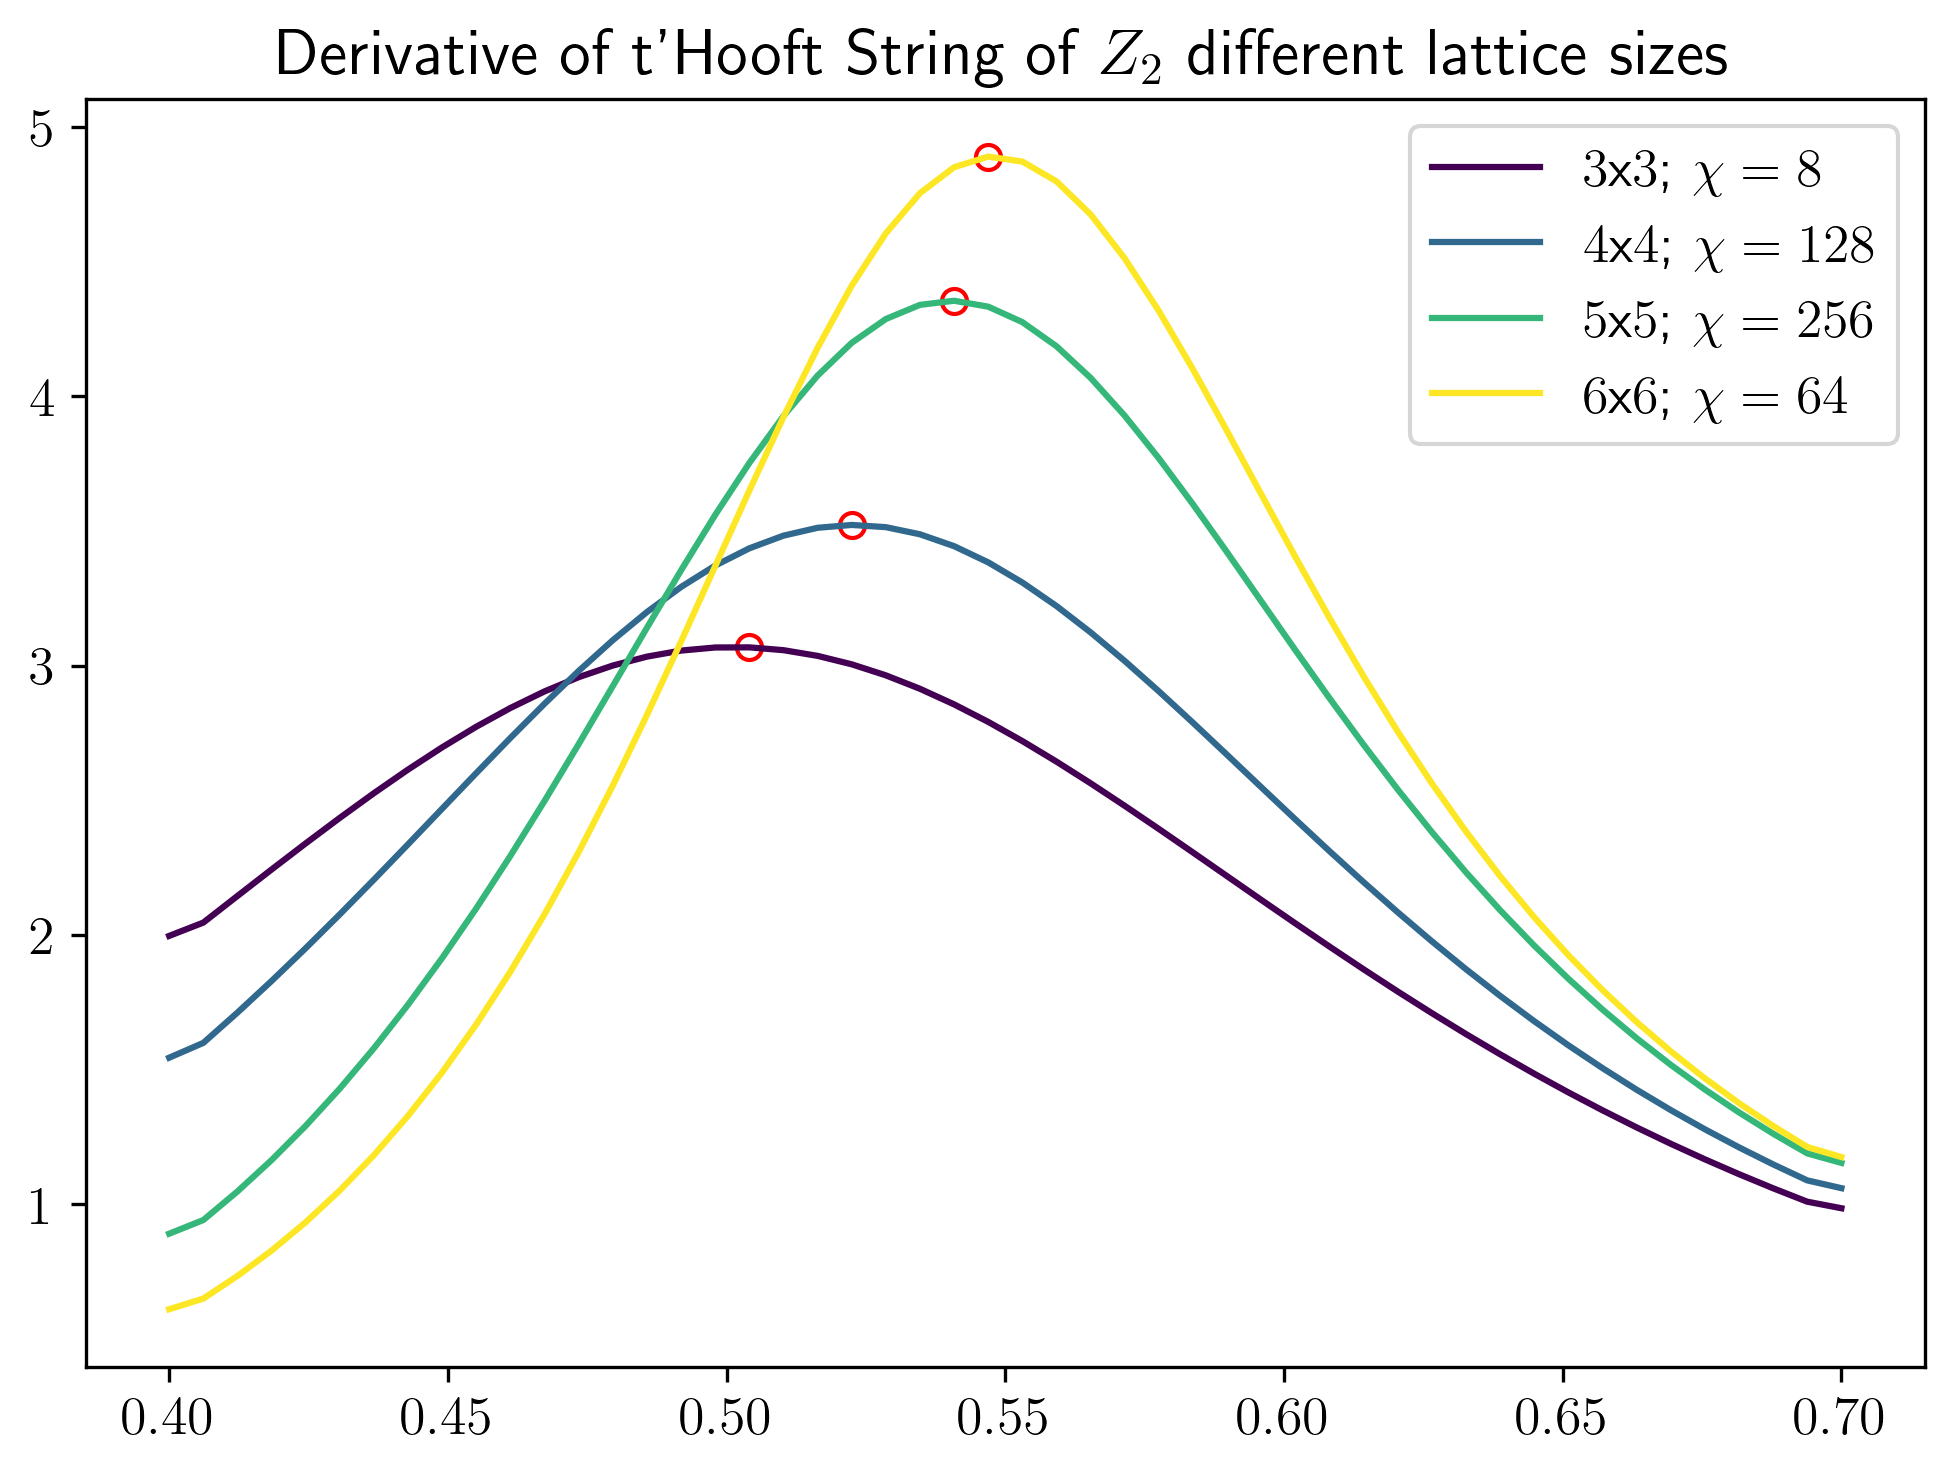

In [ ]:
colors = create_sequential_colors(len(chis))
i = 0
max_vals = []
x_vals = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    d_string_dh = np.gradient(string, hs)
    idx_max = np.argmax(d_string_dh)
    max_vals.append(np.max(d_string_dh))
    x_vals.append(hs[idx_max])
    plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1
plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
plt.title(f"Derivative of t'Hooft String of $Z_2$ different lattice sizes")
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_derivative_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

plt.legend();

In [ ]:
def lin_law(x,a,b):
    return a*x+b

def power_law(L, a, b, c):
    return a + b*(L**c)

x_data = Ls
y_data = x_vals
popt_power, copt_power = curve_fit(power_law, x_data, y_data, maxfev=5000)
print(f"the nu: {-1/popt_power[2]}")
print(f"the gc: {popt_power[0]}")

# third method
x_data = np.log(np.abs(1/np.asarray(Ls)))
y_data = np.log(np.abs(np.asarray(x_vals)-1/np.sqrt(3.044)))

popt_log_3, copt_log_3 = curve_fit(lin_law, x_data, y_data)
print(f"3: The nu is: {1/popt_log_3[0]}")

# first method
x_data = np.log(np.abs(np.asarray(x_vals)-0.555))
y_data = np.log(np.abs(max_vals))

popt_log_1, copt_log_1 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {-popt_log_1[0]}")

# second method
x_data = np.log(1/np.asarray(Ls))
y_data = np.log(np.abs(max_vals))

popt_log_2, copt_log_2 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {popt_log_2[0]*(-1/popt_power[2])}")

the nu: -1578.6553699684916
the gc: -100.97512721983509
3: The nu is: 0.6895977883526017
The gamma is: 0.25272007909569877
The gamma is: 1095.5609259420294


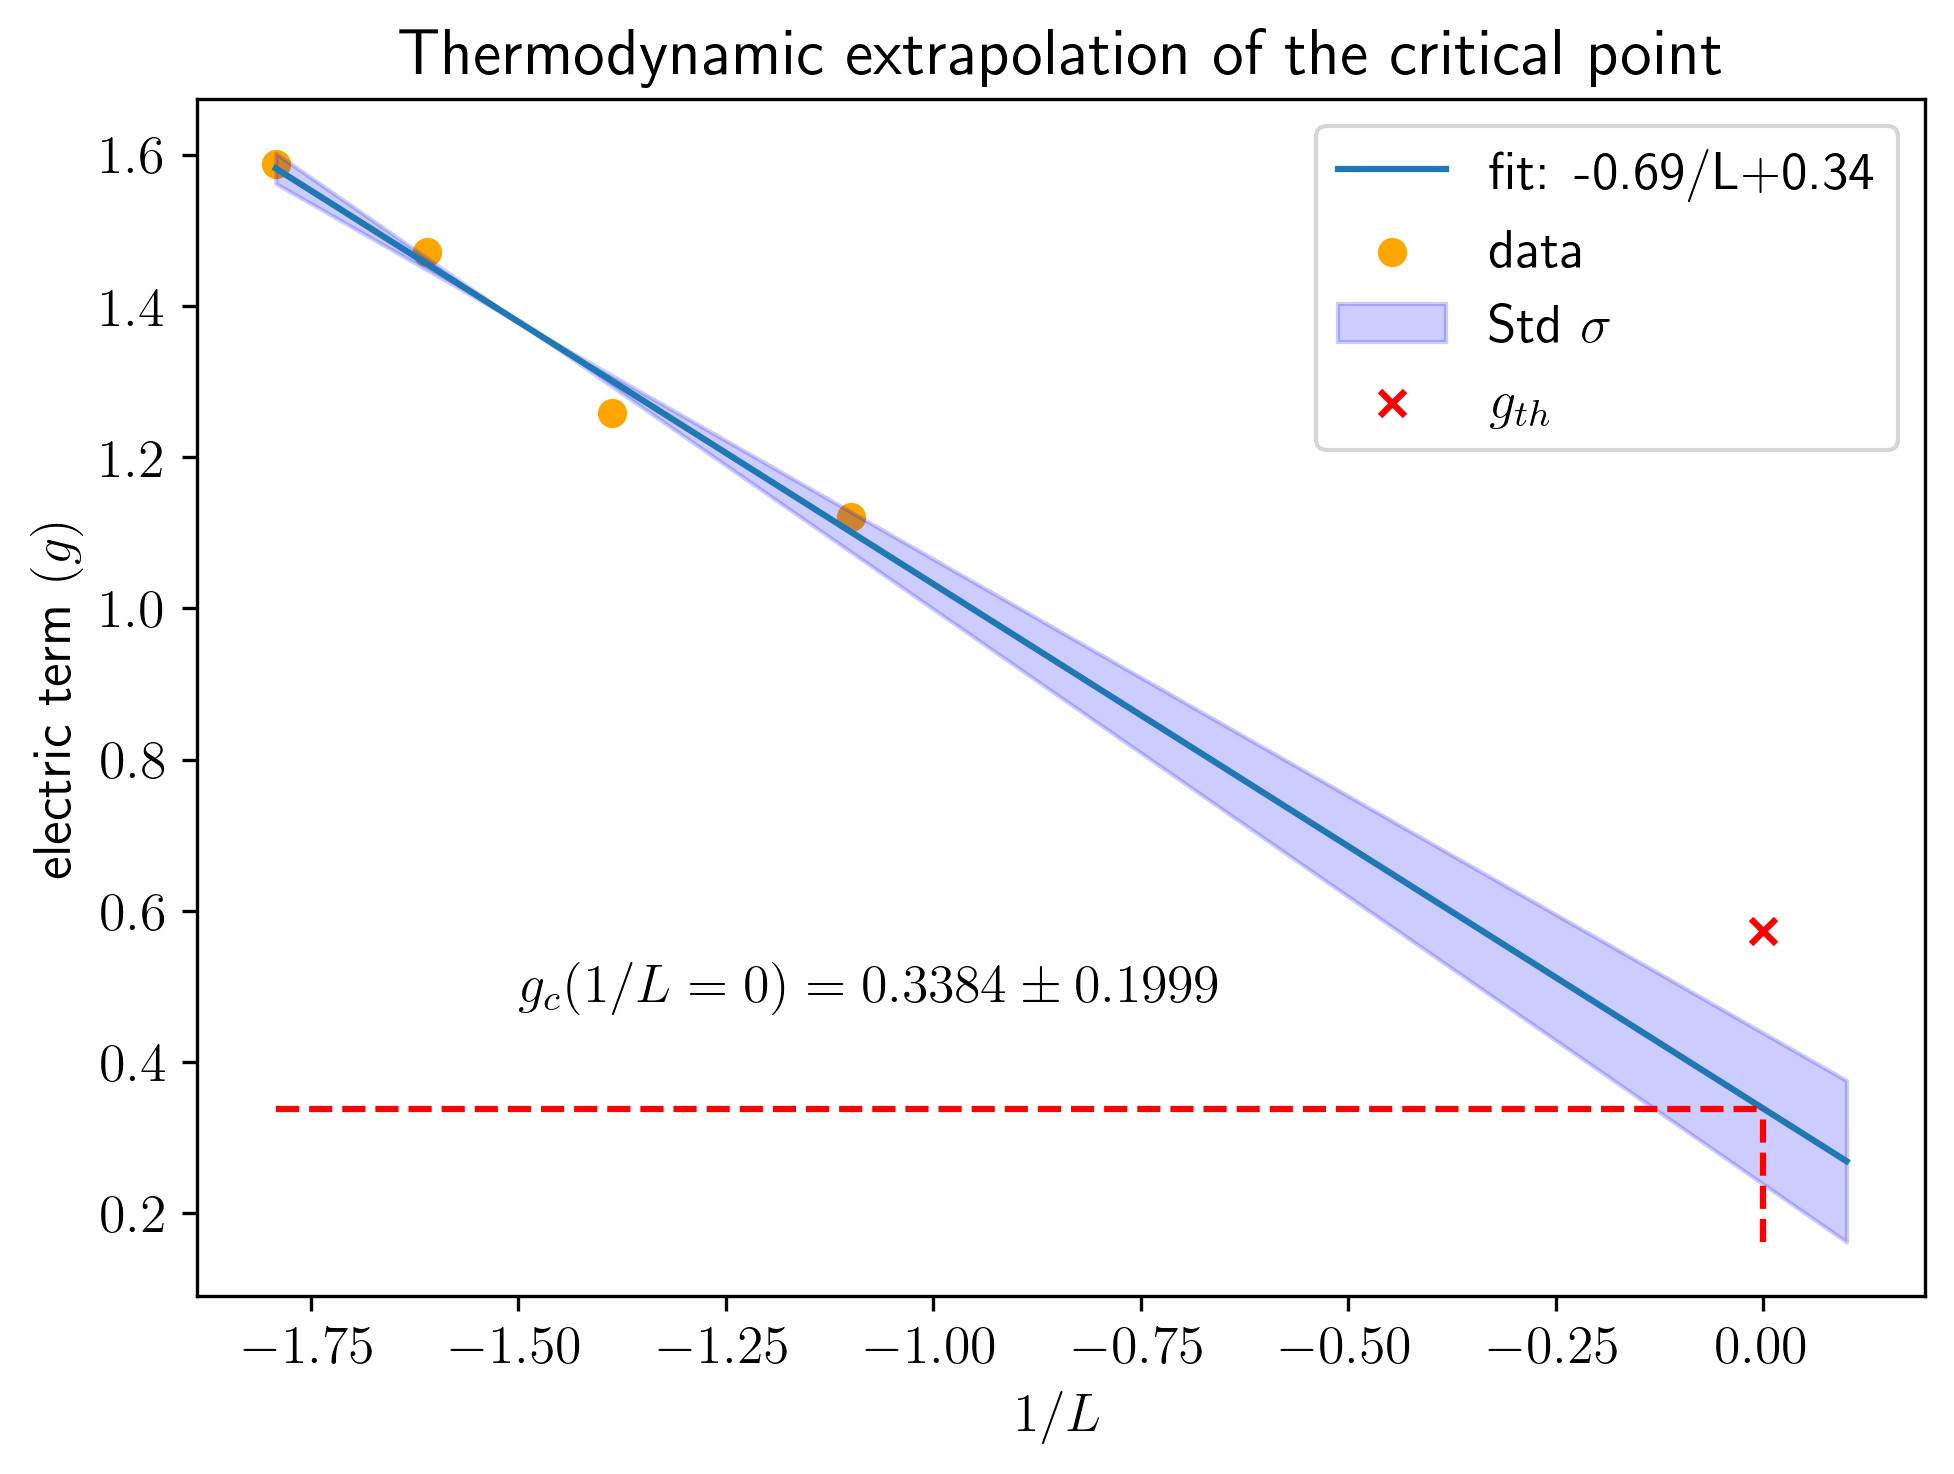

In [ ]:
entr_max = []
idx_max = []
Ls_inv = [1/3,1/4,1/5,1/6]
g_th = 1/np.sqrt(3.044)

x_data = np.log(np.abs(Ls_inv))
y_data = np.log(np.abs(max_vals))

p_opt, c_opt = curve_fit(lin_law, x_data, y_data)

xs = np.linspace(x_data[-1],0.1,50)
y_fit = lin_law(xs, p_opt[0], p_opt[1])
err = np.sqrt(np.diag(c_opt))
y_err_plus = lin_law(xs, p_opt[0]+err[0], p_opt[1]+err[1])
y_err_minus = lin_law(xs, p_opt[0]-err[0], p_opt[1]-err[1])
plt.title("Thermodynamic extrapolation of the critical point")
plt.plot(xs, y_fit, label=f'fit: {round(p_opt[0],2)}/L+{round(p_opt[1],2)}')
plt.scatter(x_data, y_data, color='orange', label='data')
h_c = round(lin_law(x=0,a=p_opt[0],b=p_opt[1]),4)
h_c_err_plus = round(lin_law(x=0,a=p_opt[0]+err[0],b=p_opt[1]+err[1]),4)
h_c_err_minus = round(lin_law(x=0,a=p_opt[0]-err[0],b=p_opt[1]-err[1]),4)
h_c_err = round(h_c_err_plus - h_c_err_minus, 4)
plt.text(x=-1.5, y=0.48, s=f"$g_c(1/L=0)={h_c}\pm{h_c_err}$")
plt.hlines(y=h_c, xmin=xs[0], xmax=0, linestyles='--', colors='red')
plt.vlines(x=0, ymin=y_err_minus[-1], ymax=h_c, linestyles='--', colors='red')
plt.fill_between(xs, y_err_minus, y_err_plus, color='blue', alpha=0.2, label='Std $\sigma$')
plt.scatter([0], [g_th], marker='x', color='red', label='$g_{th}$')
plt.xlabel("$1/L$")
plt.ylabel("electric term $(g)$")

plt.legend()
plt.show();

In [ ]:
p_opt

array([-0.69398359,  0.33843769])

The slope of the curve is 2.580699597927036
So that nu is 0.3874918261711889
The th value is 0.629971(4)


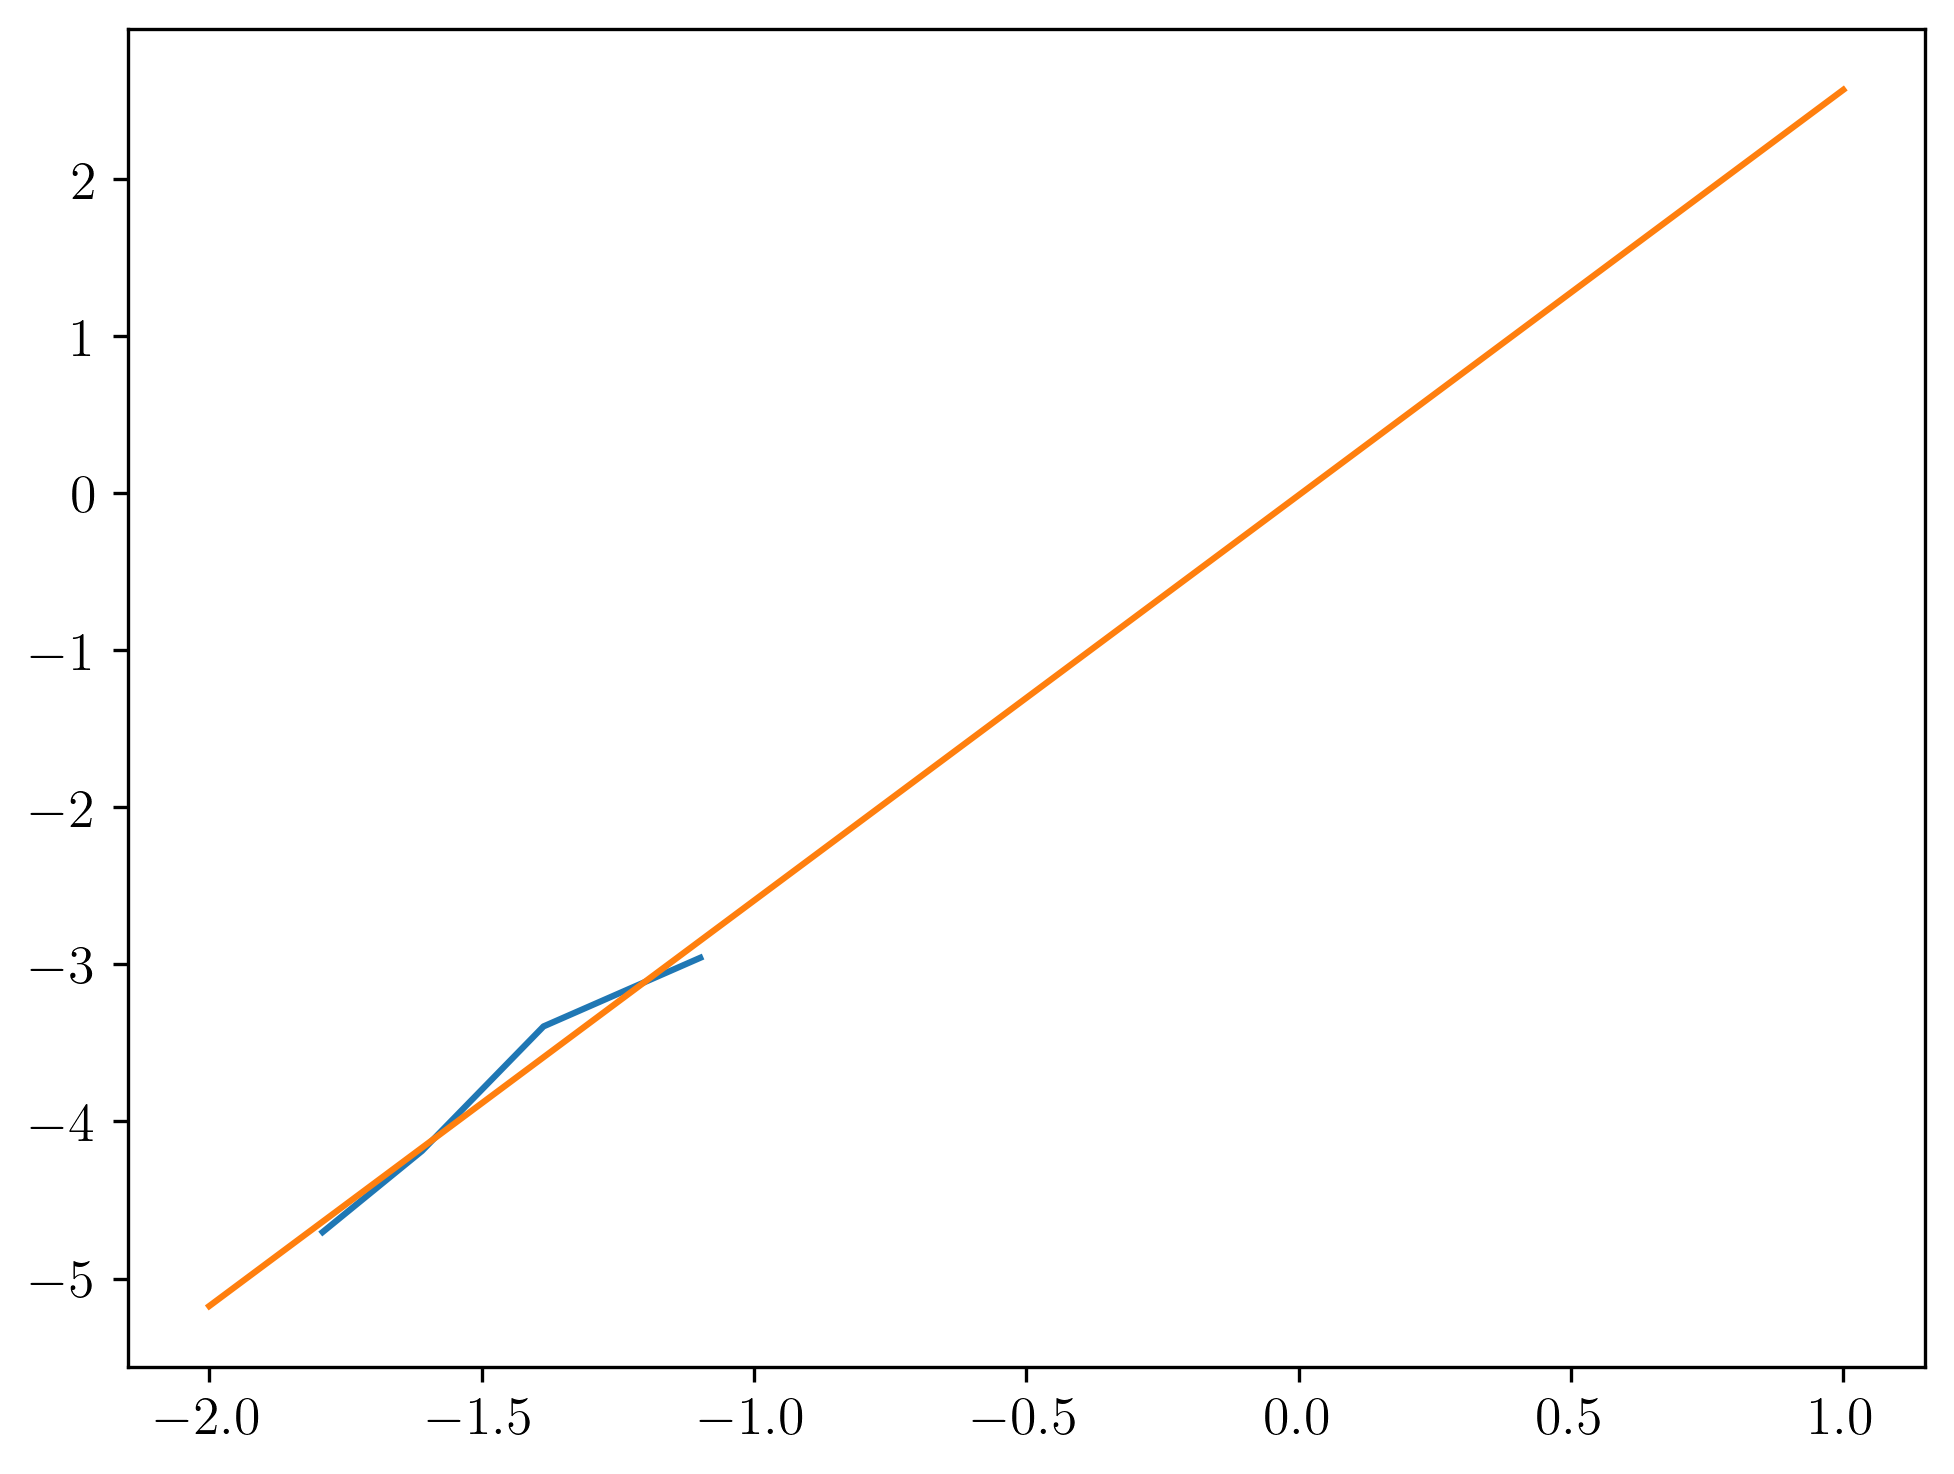

In [ ]:
y_data = np.log(np.abs(np.asarray(x_vals)-0.556))

x_data = np.log(Ls_inv)
x_data

plin, _ = curve_fit(lin_law, xdata=x_data, ydata=y_data)
xs = np.linspace(-2, 1, 50)
plt.plot(x_data,y_data)
plt.plot(xs, lin_law(xs, plin[0], plin[1]))
print(f"The slope of the curve is {plin[0]}")
print(f"So that nu is {1/plin[0]}")
print(f"The th value is 0.629971(4)")

### 2. Binder's Cumulant

In [4]:
Ls = [4,5,6]
chis = [128,256,64]
h_i = 0.4
h_f = 0.7
npoints = 50
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
for L, chi in zip(Ls, chis):
    l = L
    string2 = np.load("/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_0.4-0.7_delta_50_chi_128.npy")
    string2 = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    string4 = np.load(f"{parent_path}/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    bc = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, bc, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1

plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
plt.legend();
plt.savefig(f"{parent_path}/figures/critical_exponents/binders_cumulant_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


TimeoutError: [Errno 60] Operation timed out